# Stock Market API Project
Collect stock data for any given company using rapidAPI

1. Create an account on RapidAPI - https://rapidapi.com/auth/sign-up
2. Alpha vantage API - https://rapidapi.com/alphavantage/api/alpha-vantage

# Install required packages

In [2]:
%pip install python-dotenv requests

Note: you may need to restart the kernel to use updated packages.


# Loading API key from .env file

In [3]:
from dotenv import load_dotenv
load_dotenv()

True

In [4]:
import os
api_key = os.getenv("API_KEY")

### Symbol Search functionality

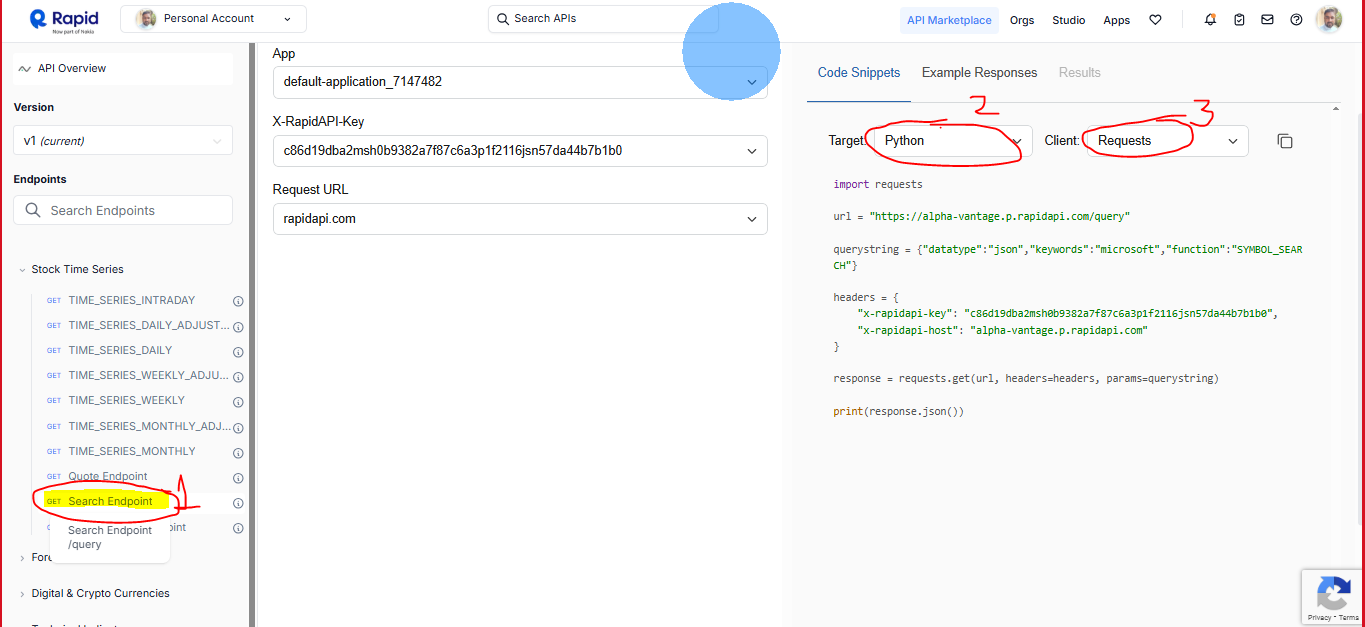

In [ ]:
import requests

url = "https://alpha-vantage.p.rapidapi.com/query"

querystring = {"datatype":"json","keywords":"State Bank Of India","function":"SYMBOL_SEARCH"}

headers = {
	"x-rapidapi-key": api_key,
	"x-rapidapi-host": "alpha-vantage.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

data = response.json()
data

In [6]:
symbol=data["bestMatches"]
symbol

[{'1. symbol': 'SBIN.BSE',
  '2. name': 'State Bank of India',
  '3. type': 'Equity',
  '4. region': 'India/Bombay',
  '5. marketOpen': '09:15',
  '6. marketClose': '15:30',
  '7. timezone': 'UTC+5.5',
  '8. currency': 'INR',
  '9. matchScore': '1.0000'},
 {'1. symbol': 'SBKFF',
  '2. name': 'State Bank of India',
  '3. type': 'Equity',
  '4. region': 'United States',
  '5. marketOpen': '09:30',
  '6. marketClose': '16:00',
  '7. timezone': 'UTC-04',
  '8. currency': 'USD',
  '9. matchScore': '1.0000'},
 {'1. symbol': 'SID.FRK',
  '2. name': 'State Bank of India',
  '3. type': 'Equity',
  '4. region': 'Frankfurt',
  '5. marketOpen': '08:00',
  '6. marketClose': '20:00',
  '7. timezone': 'UTC+02',
  '8. currency': 'EUR',
  '9. matchScore': '1.0000'},
 {'1. symbol': 'SBID.LON',
  '2. name': 'State Bank of India GDR',
  '3. type': 'Equity',
  '4. region': 'United Kingdom',
  '5. marketOpen': '08:00',
  '6. marketClose': '16:30',
  '7. timezone': 'UTC+01',
  '8. currency': 'USD',
  '9. mat

In [7]:
symbol_new={}
for i in symbol:
    s=i['1. symbol']
    symbol_new[s]=[i['2. name'],i['4. region'],i['8. currency']]

In [8]:
symbol_new

{'SBIN.BSE': ['State Bank of India', 'India/Bombay', 'INR'],
 'SBKFF': ['State Bank of India', 'United States', 'USD'],
 'SID.FRK': ['State Bank of India', 'Frankfurt', 'EUR'],
 'SBID.LON': ['State Bank of India GDR', 'United Kingdom', 'USD']}

### From above symbols i want to get details for "SBIN.BSE" 

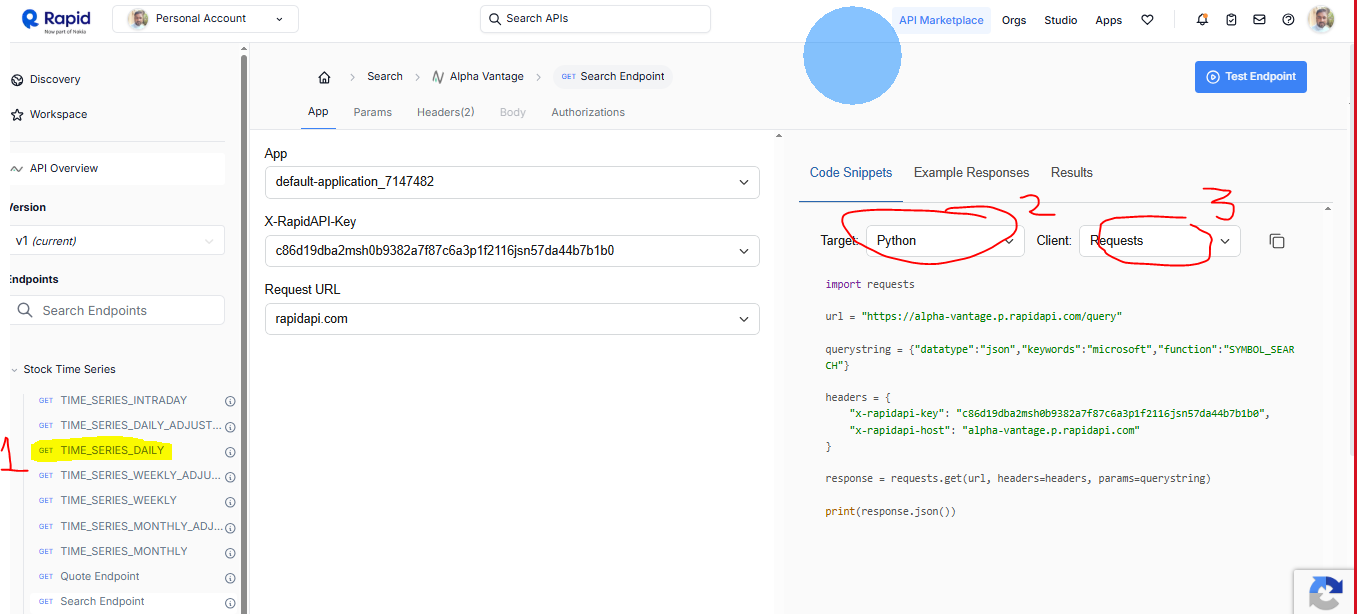

In [9]:
import requests

url = "https://alpha-vantage.p.rapidapi.com/query"

querystring = {"function":"TIME_SERIES_DAILY","symbol":"SBIN.BSE","outputsize":"compact","datatype":"json"}

headers = {
	"x-rapidapi-key": api_key,
	"x-rapidapi-host": "alpha-vantage.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

data2=response.json()
data2

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes',
  '2. Symbol': 'SBIN.BSE',
  '3. Last Refreshed': '2025-03-17',
  '4. Output Size': 'Compact',
  '5. Time Zone': 'US/Eastern'},
 'Time Series (Daily)': {'2025-03-17': {'1. open': '729.0000',
   '2. high': '730.9500',
   '3. low': '722.1000',
   '4. close': '722.7000',
   '5. volume': '197841'},
  '2025-03-13': {'1. open': '726.9000',
   '2. high': '731.4500',
   '3. low': '724.3500',
   '4. close': '727.7500',
   '5. volume': '229142'},
  '2025-03-12': {'1. open': '729.9500',
   '2. high': '736.5000',
   '3. low': '719.2000',
   '4. close': '722.9000',
   '5. volume': '198814'},
  '2025-03-11': {'1. open': '724.9000',
   '2. high': '733.9000',
   '3. low': '722.5000',
   '4. close': '729.9500',
   '5. volume': '285624'},
  '2025-03-10': {'1. open': '732.9500',
   '2. high': '738.4500',
   '3. low': '727.0500',
   '4. close': '728.3500',
   '5. volume': '339175'},
  '2025-03-07': {'1. open': '732.9500'

In [10]:
data2.keys()

dict_keys(['Meta Data', 'Time Series (Daily)'])

In [11]:
prices = data2["Time Series (Daily)"]

In [12]:
import pandas as pd
df = pd.DataFrame(prices).T
df

,1. open,2. high,3. low,4. close,5. volume
2025-03-17,729.0000,730.9500,722.1000,722.7000,197841
2025-03-13,726.9000,731.4500,724.3500,727.7500,229142
2025-03-12,729.9500,736.5000,719.2000,722.9000,198814
2025-03-11,724.9000,733.9000,722.5000,729.9500,285624
2025-03-10,732.9500,738.4500,727.0500,728.3500,339175
...,...,...,...,...,...
2024-10-25,798.4500,800.0000,772.0500,780.6000,650630
2024-10-24,786.0500,796.8000,784.5000,794.7000,183971
2024-10-23,790.0000,792.5000,779.6000,785.9500,467975
2024-10-22,814.1500,816.3500,787.6000,790.4500,604778


In [13]:
df.dtypes

1. open      object
2. high      object
3. low       object
4. close     object
5. volume    object
dtype: object

In [14]:
# Convert all data to float
df = df.astype(float)
df.dtypes

1. open      float64
2. high      float64
3. low       float64
4. close     float64
5. volume    float64
dtype: object

In [15]:
# Index not in date format
df.index

Index(['2025-03-17', '2025-03-13', '2025-03-12', '2025-03-11', '2025-03-10',
       '2025-03-07', '2025-03-06', '2025-03-05', '2025-03-04', '2025-03-03',
       '2025-02-28', '2025-02-27', '2025-02-25', '2025-02-24', '2025-02-21',
       '2025-02-20', '2025-02-19', '2025-02-18', '2025-02-17', '2025-02-14',
       '2025-02-13', '2025-02-12', '2025-02-11', '2025-02-10', '2025-02-07',
       '2025-02-06', '2025-02-05', '2025-02-04', '2025-02-03', '2025-01-31',
       '2025-01-30', '2025-01-29', '2025-01-28', '2025-01-27', '2025-01-24',
       '2025-01-23', '2025-01-22', '2025-01-21', '2025-01-20', '2025-01-17',
       '2025-01-16', '2025-01-15', '2025-01-14', '2025-01-13', '2025-01-10',
       '2025-01-09', '2025-01-08', '2025-01-07', '2025-01-06', '2025-01-03',
       '2025-01-02', '2025-01-01', '2024-12-31', '2024-12-30', '2024-12-27',
       '2024-12-26', '2024-12-24', '2024-12-23', '2024-12-20', '2024-12-19',
       '2024-12-18', '2024-12-17', '2024-12-16', '2024-12-13', '2024-12-12',

In [16]:
df.index = pd.to_datetime(df.index)
df.index

DatetimeIndex(['2025-03-17', '2025-03-13', '2025-03-12', '2025-03-11',
               '2025-03-10', '2025-03-07', '2025-03-06', '2025-03-05',
               '2025-03-04', '2025-03-03', '2025-02-28', '2025-02-27',
               '2025-02-25', '2025-02-24', '2025-02-21', '2025-02-20',
               '2025-02-19', '2025-02-18', '2025-02-17', '2025-02-14',
               '2025-02-13', '2025-02-12', '2025-02-11', '2025-02-10',
               '2025-02-07', '2025-02-06', '2025-02-05', '2025-02-04',
               '2025-02-03', '2025-01-31', '2025-01-30', '2025-01-29',
               '2025-01-28', '2025-01-27', '2025-01-24', '2025-01-23',
               '2025-01-22', '2025-01-21', '2025-01-20', '2025-01-17',
               '2025-01-16', '2025-01-15', '2025-01-14', '2025-01-13',
               '2025-01-10', '2025-01-09', '2025-01-08', '2025-01-07',
               '2025-01-06', '2025-01-03', '2025-01-02', '2025-01-01',
               '2024-12-31', '2024-12-30', '2024-12-27', '2024-12-26',
      

In [17]:
df.index.name = "Date"

In [18]:
df

,1. open,2. high,3. low,4. close,5. volume
Date,,,,,
2025-03-17,729.00,730.95,722.10,722.70,197841.0
2025-03-13,726.90,731.45,724.35,727.75,229142.0
2025-03-12,729.95,736.50,719.20,722.90,198814.0
2025-03-11,724.90,733.90,722.50,729.95,285624.0
2025-03-10,732.95,738.45,727.05,728.35,339175.0
...,...,...,...,...,...
2024-10-25,798.45,800.00,772.05,780.60,650630.0
2024-10-24,786.05,796.80,784.50,794.70,183971.0
2024-10-23,790.00,792.50,779.60,785.95,467975.0


In [19]:
df.to_csv("SBIN.csv")

### Visualize candlestick chart

In [21]:
%pip install plotly nbformat

Note: you may need to restart the kernel to use updated packages.


In [22]:
import plotly.graph_objects as go

In [23]:
fig = go.Figure(data = [
    go.Candlestick(
        x = df.index,
        open= df["1. open"],
        high= df["2. high"],
        low = df["3. low"],
        close= df["4. close"]
    )
])

fig.update_layout(width = 1200, height = 800)

fig.show()

In [24]:
type(fig)

plotly.graph_objs._figure.Figure

## Create a class to get data for any stock

In [25]:
from dotenv import load_dotenv
import os
import pandas as pd
import requests
import plotly.graph_objects as go

In [26]:
class StockAPI:

    def __init__(self):
        # Load the api key
        load_dotenv()
        self.api_key = os.getenv("API_KEY")
        # Get the url
        self.url = "https://alpha-vantage.p.rapidapi.com/query"
        # Show the headers
        self.headers = {
            "x-rapidapi-key": self.api_key,
            "x-rapidapi-host": "alpha-vantage.p.rapidapi.com",
        }

    def symbol_search(self, company: str) -> dict:
        querystring = {
            "datatype": "json",
            "keywords": company,
            "function": "SYMBOL_SEARCH",
        }
        response = requests.get(self.url, headers=self.headers, params=querystring)
        data = response.json()["bestMatches"]
        symbols = {}
        for i in data:
            s = i["1. symbol"]
            symbols[s] = [i["2. name"], i["4. region"], i["8. currency"]]
        # Return the symbols dictionary
        return symbols

    def get_daily_data(self, symbol: str) -> pd.DataFrame:
        querystring = {
            "function": "TIME_SERIES_DAILY",
            "symbol": symbol,
            "outputsize": "compact",
            "datatype": "json",
        }
        response = requests.get(self.url, headers= self.headers, params=querystring)
        data = response.json()["Time Series (Daily)"]
        # Convert into dataframe
        df = pd.DataFrame(data).T
        # Convert datatypes to float
        df = df.astype(float)
        # Convert index to datetime
        df.index = pd.to_datetime(df.index)
        # Provide a name to index
        df.index.name = "Date"
        return df
    
    def candlestick_chart(self, df: pd.DataFrame) -> go.Figure:
        fig = go.Figure(data = [
            go.Candlestick(
                x = df.index,
                open= df["1. open"],
                high= df["2. high"],
                low = df["3. low"],
                close= df["4. close"]
            )
        ])
        fig.update_layout(width = 1200, height = 800)
        return fig

### Get the details for Tesla company stock

In [27]:
client = StockAPI()

In [28]:
client.symbol_search("Tesla")

{'TSLA': ['Tesla Inc', 'United States', 'USD'],
 'TL0.DEX': ['Tesla Inc', 'XETRA', 'EUR'],
 'TL0.FRK': ['Tesla Inc', 'Frankfurt', 'EUR'],
 'TSLA34.SAO': ['Tesla Inc', 'Brazil/Sao Paolo', 'BRL'],
 'TSLA.TRT': ['Tesla CDR (CAD Hedged)', 'Toronto', 'CAD'],
 'TL01.FRK': ['TESLA INC. CDR DL-001', 'Frankfurt', 'EUR']}

In [29]:
df2 = client.get_daily_data("TSLA")
df2

,1. open,2. high,3. low,4. close,5. volume
Date,,,,,
2025-03-17,245.055,245.4000,232.800,238.01,111900565.0
2025-03-14,247.310,251.5800,240.730,249.98,100242264.0
2025-03-13,248.125,248.2900,232.600,240.68,114813525.0
2025-03-12,247.220,251.8400,241.100,248.09,142215681.0
2025-03-11,225.305,237.0649,217.020,230.58,174896415.0
...,...,...,...,...,...
2024-10-25,256.010,269.4900,255.320,269.19,161611931.0
2024-10-24,244.680,262.1199,242.650,260.48,204491903.0
2024-10-23,217.125,218.7200,212.110,213.65,80938892.0


In [30]:
df2.to_csv("Tesla.csv")

In [31]:
fig2 = client.candlestick_chart(df2)
fig2.show()

### Get detail for HDFC Bank India

In [32]:
client.symbol_search("HDFC Bank")

{'HDB': ['HDFC Bank Ltd', 'United States', 'USD'],
 'HDFCBANK.BSE': ['HDFC Bank Limited', 'India/Bombay', 'INR'],
 'H1DB34.SAO': ['HDFC Bank Limited', 'Brazil/Sao Paolo', 'BRL'],
 'HDFA.FRK': ['HDFC Bank Limited', 'Frankfurt', 'EUR']}

In [33]:
df3 = client.get_daily_data("HDFCBANK.BSE")
df3

,1. open,2. high,3. low,4. close,5. volume
Date,,,,,
2025-03-17,1705.80,1724.00,1705.40,1709.90,97366.0
2025-03-13,1714.90,1720.50,1700.00,1705.80,257562.0
2025-03-12,1688.85,1719.00,1688.85,1711.85,884523.0
2025-03-11,1684.30,1694.40,1670.30,1684.95,118232.0
2025-03-10,1688.35,1699.40,1683.00,1687.05,150454.0
...,...,...,...,...,...
2024-10-29,1725.10,1763.70,1725.10,1751.00,287101.0
2024-10-28,1738.80,1750.90,1728.95,1734.30,2396045.0
2024-10-25,1757.00,1758.35,1729.00,1742.60,774016.0


In [34]:
df3.to_csv("HDFC.csv")

In [35]:
fig3 = client.candlestick_chart(df3)
fig3.show()